In [3]:
### TO explore what drives the sales?
### price/discount/attribute of product/Type/Sponsor/Page

# Data Pre_processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import qgrid
import seaborn as sns
import calendar
import plotly.graph_objects as go
import re
from sklearn import preprocessing
import plotly.express as px
import plotly
import math
from sklearn.model_selection import train_test_split

##### https://www.rsgsales.com/new-blog/wayfairsponsoredproducts 

### Merge Dataset

In [3]:
area_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Area_numeric_data.csv")
doormat_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Doormat_numeric_data.csv")
hallway_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Hallway_numeric_data.csv")
kids_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Kids_numeric_data.csv")
orient_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\Orient_numeric_data.csv")
round_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\round_numeric_data.csv")
shag_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_2\\Dataset\\shag_numeric_data.csv")

In [4]:
area_data['Type'] = 'Area'
doormat_data['Type'] = 'Doormat'
hallway_data['Type'] = 'Hallway'
kids_data['Type'] = 'Kids'
orient_data['Type'] = 'Orient'
round_data['Type'] = 'Round'
shag_data['Type'] = 'Shag'

In [5]:
frames = [area_data, doormat_data, hallway_data,kids_data,orient_data,round_data,shag_data]
final_data = pd.concat(frames)


### Data Information

In [6]:
final_data.columns.tolist()

['web-scraper-order',
 'web-scraper-start-url',
 'Product_C',
 'Product_C-href',
 'Product_Name',
 'Shop_Name',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Description',
 'Collection',
 'Product_SKU',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating',
 'Sponsor_B',
 'Type']

In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 236
Data columns (total 19 columns):
web-scraper-order        1603 non-null object
web-scraper-start-url    1603 non-null object
Product_C                1603 non-null object
Product_C-href           1603 non-null object
Product_Name             1600 non-null object
Shop_Name                1596 non-null object
Sale_Price               1596 non-null object
Original_Price           1358 non-null object
Discount                 1358 non-null object
Description              1453 non-null object
Collection               1600 non-null object
Product_SKU              1600 non-null object
Review_Numbers           1572 non-null object
Customer_Rating_Total    1525 non-null float64
Size_Rating              996 non-null float64
Material_Rating          996 non-null float64
Color_Rating             996 non-null float64
Sponsor_B                136 non-null object
Type                     1603 non-null object
dtypes: float64(4), 

### Data Cleaning

In [8]:
final_data.fillna(0, inplace=True)

final_data.drop(columns = ['web-scraper-order','Product_SKU','Collection'],inplace = True)

final_data = final_data[final_data['Product_Name']!=0]

#### Missing Values for Customer_Rating_Total

In [9]:
final_data.loc[final_data['Customer_Rating_Total'] == 0,'Customer_Rating_Total'] = 4.5

#### Page

In [10]:
final_data['Page'] = final_data['web-scraper-start-url'].apply(lambda x: x[-1]).astype('category')

#### Size_num

In [11]:
final_data['Product_C'] = final_data['Product_C'].str.findall('\d+').apply(lambda x: x[0])
final_data.rename(columns={'Product_C': "Size_num"},inplace = True)
final_data['Size_num'] = final_data['Size_num'].astype('float64')
final_data['Size_num'].loc[final_data['Size_num'] > 50] = 1

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Discount

In [12]:
final_data['Discount'] = final_data['Discount'].str.findall('\d+')
final_data['Discount'] = final_data['Discount'].astype(str).str.replace('\[|\]|\'', '')
final_data['Discount'].replace('nan',0,inplace = True)
final_data['Discount'] = final_data['Discount'].astype('float64')

#### Sale_Price

In [13]:
final_data['Sale_Price'] = final_data['Sale_Price'].astype(str).str.replace('\$|\,|\'', '')
final_data['Sale_Price'] = final_data['Sale_Price'].astype('float64')

#### Original_Price

In [14]:
final_data['Original_Price'] = final_data['Original_Price'].astype(str).str.replace('\$|\,|\'', '')
final_data['Original_Price'] = final_data['Original_Price'].astype('float64')

#### Review_Numbers

In [15]:
final_data['Review_Numbers'] = final_data['Review_Numbers'].str.rsplit(' ').str[-2] 
final_data['Review_Numbers'] = final_data['Review_Numbers'].astype('float64')
final_data['Review_Numbers'].fillna(0, inplace=True)

#### Sponsor

In [16]:
final_data['Sponsor_B'].replace(0,'Non_Sponsored',inplace = True)
final_data.rename(columns = {'Sponsor_B':'Sponsor'},inplace = True)

## Final Dataset

In [17]:
final_data.head()

web-scraper-start-url  Size_num  \
0  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...      11.0   
1  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       9.0   
2  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       6.0   
3  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...       2.0   
4  https://www.wayfair.com/rugs/sb2/5-x-8-8-x-10-...      24.0   

                                      Product_C-href  \
0  https://www.wayfair.com/rugs/pdp/mercury-row-c...   
1  https://www.wayfair.com/rugs/pdp/andover-mills...   
2  https://www.wayfair.com/rugs/pdp/bungalow-rose...   
3  https://www.wayfair.com/rugs/pdp/three-posts-a...   
4  https://www.wayfair.com/rugs/pdp/mistana-tsuki...   

                          Product_Name      Shop_Name  Sale_Price  \
0           Colona Shag White Area Rug    Mercury Row       77.99   
1               Shiflett Gray Area Rug  Andover Mills       58.68   
2         Fontanne Pink/White Area Rug  Bungalow Rose      125.99   
3  Acton Ivory Indoor/Outdoor Area Rug    Three Posts       63.99   
4              Tsukiji Orange Area Rug        Mistana       91.99   

   Original_Price  Discount  \
0          180.00      57.0   
1          199.99      71.0   
2          315.00      60.0   
3          163.14      61.0   
4          365.70      75.0   

                                         Description  Review_Numbers  \
0  Tastefully tousled, this shag area rug showcas...          8574.0   
1  Warm-up hardwood and tiles floors while provid...          5180.0   
2  Soft to the touch and alluring with a distinct...          1417.0   
3  More than anything else, area rugs are art for...           607.0   
4  With bright tones and a distressed Persian-ins...         12136.0   

   Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  \
0                    4.6          4.7              4.5           4.8   
1                    4.7          4.8              4.8           4.8   
2                    4.8          4.6              4.6           4.9   
3                    4.8          4.9              4.7           4.8   
4                    4.7          4.4              4.7           5.0   

         Sponsor  Type Page  
0  Non_Sponsored  Area    0  
1  Non_Sponsored  Area    3  
2  Non_Sponsored  Area    2  
3  Non_Sponsored  Area    5  
4  Non_Sponsored  Area    3

In [18]:
final_data.to_excel('final_dataset.xlsx')

C:\Users\Yilin\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning:

Ignoring URL 'https://www.wayfair.com/rugs/pdp/bungalow-rose-marcial-chindi-hand-knotted-cotton-navy-blue-area-rug-w000281968.html?piid=1312597938&category=215386&placement=8&slot=5&sponsoredid=d9ffe0b570fb3c3776e38fe18754053b1cb802596ceb33acb97b0e97db44c105&_txid=otAgcF2dBSwpH89TH17oAg%3D%3D&isB2b=0' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS

C:\Users\Yilin\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWarning:

Ignoring URL 'https://www.wayfair.com/rugs/pdp/winston-porter-wawona-yellow-area-rug-w001765193.html?piid=2047075611&category=215386&placement=8&slot=1&sponsoredid=e3f9448fcdee3a6760f735e4e64f2936ed661c9b69aa23bd58dfb131076d1e0d&_txid=otAgcF2dBSwpH89TH17oAg%3D%3D&isB2b=0' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS

C:\Users\Yilin\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:931: UserWa

In [21]:
final_data = final_data[['Product_Name',
 'Shop_Name',
 'Description',
 'Sponsor',
 'Type',
 'Product_C-href',
 'Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating']]

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Data columns (total 16 columns):
Product_Name             1600 non-null object
Shop_Name                1600 non-null object
Description              1600 non-null object
Sponsor                  1600 non-null object
Type                     1600 non-null object
Product_C-href           1600 non-null object
Page                     1600 non-null category
Size_num                 1600 non-null float64
Sale_Price               1600 non-null float64
Original_Price           1600 non-null float64
Discount                 1600 non-null float64
Review_Numbers           1600 non-null float64
Customer_Rating_Total    1600 non-null float64
Size_Rating              1600 non-null float64
Material_Rating          1600 non-null float64
Color_Rating             1600 non-null float64
dtypes: category(1), float64(9), object(6)
memory usage: 201.8+ KB


### Categorical Data

In [23]:
cat_data = final_data[['Shop_Name',
 'Sponsor',
 'Type']]

In [24]:
cat_data

Shop_Name        Sponsor  Type
0           Mercury Row  Non_Sponsored  Area
1         Andover Mills  Non_Sponsored  Area
2         Bungalow Rose  Non_Sponsored  Area
3           Three Posts  Non_Sponsored  Area
4               Mistana  Non_Sponsored  Area
..                  ...            ...   ...
232       Bungalow Rose  Non_Sponsored  Shag
233  Glamour Home Decor  Non_Sponsored  Shag
234       Ebern Designs  Non_Sponsored  Shag
235           Viv + Rae  Non_Sponsored  Shag
236       Bungalow Rose      Sponsored  Shag

[1600 rows x 3 columns]

### Numerical Data

In [25]:
num_data = final_data[['Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating']]

In [26]:
num_data.head()

Page  Size_num  Sale_Price  Original_Price  Discount  Review_Numbers  \
0    0      11.0       77.99          180.00      57.0          8574.0   
1    3       9.0       58.68          199.99      71.0          5180.0   
2    2       6.0      125.99          315.00      60.0          1417.0   
3    5       2.0       63.99          163.14      61.0           607.0   
4    3      24.0       91.99          365.70      75.0         12136.0   

   Customer_Rating_Total  Size_Rating  Material_Rating  Color_Rating  
0                    4.6          4.7              4.5           4.8  
1                    4.7          4.8              4.8           4.8  
2                    4.8          4.6              4.6           4.9  
3                    4.8          4.9              4.7           4.8  
4                    4.7          4.4              4.7           5.0

### Text Data

In [27]:
text_data = final_data[['Description','Product_Name']]
text_data

Description  \
0    Tastefully tousled, this shag area rug showcas...   
1    Warm-up hardwood and tiles floors while provid...   
2    Soft to the touch and alluring with a distinct...   
3    More than anything else, area rugs are art for...   
4    With bright tones and a distressed Persian-ins...   
..                                                 ...   
232                                                  0   
233  Wanting the luxury of sheep hide but not likin...   
234  This multi-textured shag area rug lends a retr...   
235  Ready to stand up to high foot traffic in the ...   
236                                                  0   

                                          Product_Name  
0                           Colona Shag White Area Rug  
1                               Shiflett Gray Area Rug  
2                         Fontanne Pink/White Area Rug  
3                  Acton Ivory Indoor/Outdoor Area Rug  
4                              Tsukiji Orange Area Rug  
..                                                 ...  
232             Cawley Hand-Knotted Wool Gray Area Rug  
233     Shag and flokati Faux Sheepskin White Area Rug  
234  Lilia Handmade Shag and Flokati Wool Ivory Are...  
235                                     Ivory Area Rug  
236                             Vosburg Ivory Area Rug  

[1600 rows x 2 columns]

### Features Engineering

#### Engineer Categorical Data

##### Sponsor

In [28]:
Sponsor = pd.get_dummies(final_data['Sponsor']).astype('int64')
Sponsor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Data columns (total 2 columns):
Non_Sponsored    1600 non-null int64
Sponsored        1600 non-null int64
dtypes: int64(2)
memory usage: 37.5 KB


##### Type

In [29]:
Type = pd.get_dummies(final_data['Type']).astype('int64')
Type

Area  Doormat  Hallway  Kids  Orient  Round  Shag
0       1        0        0     0       0      0     0
1       1        0        0     0       0      0     0
2       1        0        0     0       0      0     0
3       1        0        0     0       0      0     0
4       1        0        0     0       0      0     0
..    ...      ...      ...   ...     ...    ...   ...
232     0        0        0     0       0      0     1
233     0        0        0     0       0      0     1
234     0        0        0     0       0      0     1
235     0        0        0     0       0      0     1
236     0        0        0     0       0      0     1

[1600 rows x 7 columns]

##### Shop_Name

In [30]:
Shop_Name = pd.get_dummies(final_data['Shop_Name']).astype('int64')
Shop_Name

0  17 Stories  A1 Home Collections LLC  Alcott Hill  Andover Mills  \
0    0           0                        0            0              0   
1    0           0                        0            0              1   
2    0           0                        0            0              0   
3    0           0                        0            0              0   
4    0           0                        0            0              0   
..  ..         ...                      ...          ...            ...   
232  0           0                        0            0              0   
233  0           0                        0            0              0   
234  0           0                        0            0              0   
235  0           0                        0            0              0   
236  0           0                        0            0              0   

     Astoria Grand  Attraction Design Home  August Grove  Bay Isle Home  \
0                0                       0             0              0   
1                0                       0             0              0   
2                0                       0             0              0   
3                0                       0             0              0   
4                0                       0             0              0   
..             ...                     ...           ...            ...   
232              0                       0             0              0   
233              0                       0             0              0   
234              0                       0             0              0   
235              0                       0             0              0   
236              0                       0             0              0   

     Bayou Breeze  ...  Wildkin  Wildon Home®  Willa Arlo Interiors  \
0               0  ...        0             0                     0   
1               0  ...        0             0                     0   
2               0  ...        0             0                     0   
3               0  ...        0             0                     0   
4               0  ...        0             0                     0   
..            ...  ...      ...           ...                   ...   
232             0  ...        0             0                     0   
233             0  ...        0             0                     0   
234             0  ...        0             0                     0   
235             0  ...        0             0                     0   
236             0  ...        0             0                     0   

     Williston Forge  Winston Porter  World Menagerie  Wrought Studio  \
0                  0               0                0               0   
1                  0               0                0               0   
2                  0               0                0               0   
3                  0               0                0               0   
4                  0               0                0               0   
..               ...             ...              ...             ...   
232                0               0                0               0   
233                0               0                0               0   
234                0               0                0               0   
235                0               0                0               0   
236                0               0                0               0   

     Zipcode Design  Zoomie Kids  iDesign  
0                 0            0        0  
1                 0            0        0  
2                 0            0        0  
3                 0            0        0  
4                 0            0        0  
..              ...          ...      ...  
232               0            0        0  
233               0            0        0  
234               0            0        0  
235               0            0 

#### Engineer Numerical Data

##### Sale Price

In [31]:
final_data['Sale_Price_Range'] = pd.qcut(final_data['Sale_Price'], 7)
final_data['Sale_Price_Range'].astype('str')

0        (62.99, 79.99]
1        (47.99, 62.99]
2      (107.99, 392.99]
3        (62.99, 79.99]
4       (79.99, 107.99]
             ...       
232     (79.99, 107.99]
233      (62.99, 79.99]
234      (62.99, 79.99]
235     (31.447, 40.99]
236      (62.99, 79.99]
Name: Sale_Price_Range, Length: 1600, dtype: object

In [32]:
Sale_Price_Dummy = pd.get_dummies(final_data['Sale_Price_Range'], sparse=True)
Sale_Price_Dummy

(-0.001, 31.447]  (31.447, 40.99]  (40.99, 47.99]  (47.99, 62.99]  \
0                   0                0               0               0   
1                   0                0               0               1   
2                   0                0               0               0   
3                   0                0               0               0   
4                   0                0               0               0   
..                ...              ...             ...             ...   
232                 0                0               0               0   
233                 0                0               0               0   
234                 0                0               0               0   
235                 0                1               0               0   
236                 0                0               0               0   

     (62.99, 79.99]  (79.99, 107.99]  (107.99, 392.99]  
0                 1                0                 0  
1                 0                0                 0  
2                 0                0                 1  
3                 1                0                 0  
4                 0                1                 0  
..              ...              ...               ...  
232               0                1                 0  
233               1                0                 0  
234               1                0                 0  
235               0                0                 0  
236               1                0                 0  

[1600 rows x 7 columns]

In [33]:
Sale_Price_Dummy.columns.tolist()

[Interval(-0.001, 31.447, closed='right'),
 Interval(31.447, 40.99, closed='right'),
 Interval(40.99, 47.99, closed='right'),
 Interval(47.99, 62.99, closed='right'),
 Interval(62.99, 79.99, closed='right'),
 Interval(79.99, 107.99, closed='right'),
 Interval(107.99, 392.99, closed='right')]

##### Original_Price

In [34]:
final_data['Original_Price_Range'] = pd.qcut(final_data['Original_Price'], 6)
final_data['Original_Price_Range'].astype('str')

0       (138.0, 219.0]
1       (138.0, 219.0]
2      (219.0, 1701.0]
3       (138.0, 219.0]
4      (219.0, 1701.0]
            ...       
232    (219.0, 1701.0]
233      (59.99, 94.0]
234      (94.0, 138.0]
235      (94.0, 138.0]
236     (138.0, 219.0]
Name: Original_Price_Range, Length: 1600, dtype: object

In [35]:
Original_Price_Dummy = pd.get_dummies(final_data['Original_Price_Range'], sparse=True)
Original_Price_Dummy

(-0.001, 25.495]  (25.495, 59.99]  (59.99, 94.0]  (94.0, 138.0]  \
0                   0                0              0              0   
1                   0                0              0              0   
2                   0                0              0              0   
3                   0                0              0              0   
4                   0                0              0              0   
..                ...              ...            ...            ...   
232                 0                0              0              0   
233                 0                0              1              0   
234                 0                0              0              1   
235                 0                0              0              1   
236                 0                0              0              0   

     (138.0, 219.0]  (219.0, 1701.0]  
0                 1                0  
1                 1                0  
2                 0                1  
3                 1                0  
4                 0                1  
..              ...              ...  
232               0                1  
233               0                0  
234               0                0  
235               0                0  
236               1                0  

[1600 rows x 6 columns]

##### Discount

In [36]:
final_data['Discount_Range'] = pd.qcut(final_data['Discount'], 6)
final_data['Discount_Range'].astype('str')
final_data['Discount_Range'] = final_data['Discount_Range'].apply(lambda x : str([x]))

In [37]:
Discount_Dummy = pd.get_dummies(final_data['Discount_Range'], sparse=True)
Discount_Dummy

[Interval(-0.001, 5.5, closed='right')]  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
232                                        0   
233                                        0   
234                                        0   
235                                        0   
236                                        0   

     [Interval(5.5, 24.0, closed='right')]  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
..                                     ...   
232                                      0   
233                                      1   
234                                      0   
235                                      0   
236                                      0   

     [Interval(24.0, 39.0, closed='right')]  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
232                                       0   
233                                       0   
234                                       0   
235                                       0   
236                                       0   

     [Interval(39.0, 54.0, closed='right')]  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
232                                       0   
233                                       0   
234                                       1   
235                                       0   
236                                       0   

     [Interval(54.0, 65.0, closed='right')]  \
0                                         1   
1                                         0   
2                                         1   
3                                         1   
4                                         0   
..                                      ...   
232                                       0   
233                                       0   
234                                       0   
235                                       1   
236                                       1   

     [Interval(65.0, 96.0, closed='right')]  
0                                         0  
1                                         1  
2                                         0  
3                                         0  
4                                         1  
..                                      ...  
232                                       1  
233                                       0  
234                                       0  
235                                       0  
236                                       0  

[1600 rows x 6 columns]

##### Review_Numbers

In [38]:
final_data['Review_Range'] = pd.qcut(final_data['Review_Numbers'], 7)
final_data['Review_Range'].astype('str')

0       (5853.143, 34975.0]
1      (1835.571, 5853.143]
2       (768.143, 1835.571]
3        (248.286, 768.143]
4       (5853.143, 34975.0]
               ...         
232            (15.0, 62.0]
233            (15.0, 62.0]
234          (-0.001, 15.0]
235      (248.286, 768.143]
236          (-0.001, 15.0]
Name: Review_Range, Length: 1600, dtype: object

In [39]:
Review_Range_Dummy = pd.get_dummies(final_data['Review_Range'], sparse=True)
Review_Range_Dummy

(-0.001, 15.0]  (15.0, 62.0]  (62.0, 248.286]  (248.286, 768.143]  \
0                 0             0                0                   0   
1                 0             0                0                   0   
2                 0             0                0                   0   
3                 0             0                0                   1   
4                 0             0                0                   0   
..              ...           ...              ...                 ...   
232               0             1                0                   0   
233               0             1                0                   0   
234               1             0                0                   0   
235               0             0                0                   1   
236               1             0                0                   0   

     (768.143, 1835.571]  (1835.571, 5853.143]  (5853.143, 34975.0]  
0                      0                     0                    1  
1                      0                     1                    0  
2                      1                     0                    0  
3                      0                     0                    0  
4                      0                     0                    1  
..                   ...                   ...                  ...  
232                    0                     0                    0  
233                    0                     0                    0  
234                    0                     0                    0  
235                    0                     0                    0  
236                    0                     0                    0  

[1600 rows x 7 columns]

### Model Dataset

In [40]:
model_dataset_Dummy = pd.concat([Sponsor, Type,Shop_Name], axis=1, join_axes=[Sponsor.index])
model_dataset_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 236
Columns: 127 entries, Non_Sponsored to iDesign
dtypes: int64(127)
memory usage: 1.6 MB


C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [41]:
model_dataset = pd.concat([model_dataset_Dummy,final_data[['Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers']]], axis=1, join_axes=[Sponsor.index])

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [42]:
list(model_dataset.columns.values)

['Non_Sponsored',
 'Sponsored',
 'Area',
 'Doormat',
 'Hallway',
 'Kids',
 'Orient',
 'Round',
 'Shag',
 0,
 '17 Stories',
 'A1 Home Collections LLC',
 'Alcott Hill',
 'Andover Mills',
 'Astoria Grand',
 'Attraction Design Home',
 'August Grove',
 'Bay Isle Home',
 'Bayou Breeze',
 'Beachcrest Home',
 'Better Trends',
 'Birch Lane™ Heritage',
 'Bison',
 'Bloomsbury Market',
 'BoldBear®Brands',
 'Brayden Studio',
 'Breakwater Bay',
 'Bungalow Rose',
 'CPS',
 'Candice Olson Rugs',
 'Canora Grey',
 "Caroline's Treasures",
 'Charlton Home',
 'Chilewich',
 'Corrigan Studio',
 'CosmoLiving by Cosmopolitan',
 'Crayola LLC',
 'Darby Home Co',
 'Design by AKRO',
 'Disney',
 'ELLE Home',
 'East Urban Home',
 'Ebern Designs',
 'Eric Carle',
 'Everly Quinn',
 'Fleur De Lis Living',
 'Foundry Select',
 'Geo Crafts, Inc',
 'George Oliver',
 'Glamour Home Decor',
 'GloriaRug',
 'Gracie Oaks',
 'Greyleigh',
 'Grovelane Teen',
 'Harriet Bee',
 'Hashtag Home',
 'Highland Dunes',
 'Home & More',
 'Home F

# Data Exploratory Analytics

## Numerical Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224121BA358>,
      dtype=object)

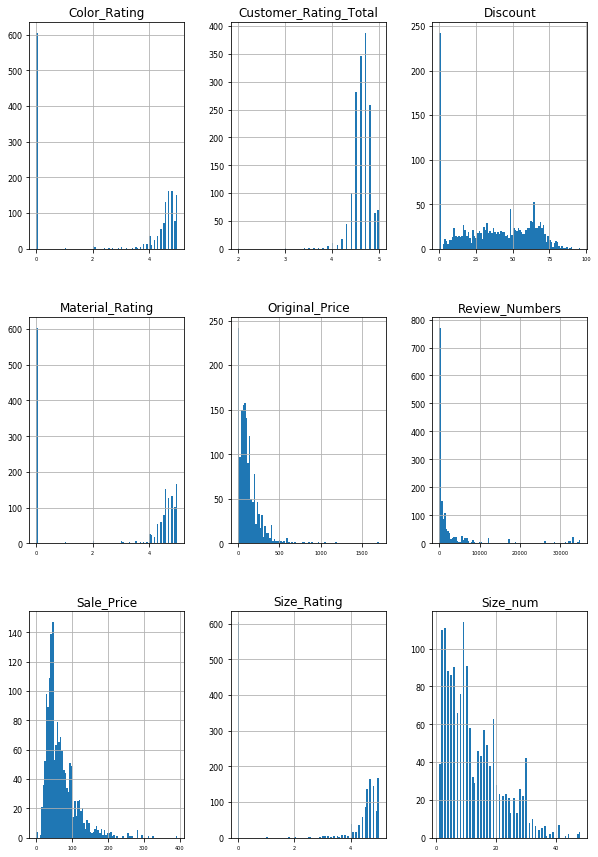

In [43]:
num_data.hist(figsize=(10, 15), bins=90, xlabelsize=5, ylabelsize=8)

## Correlation Analytics

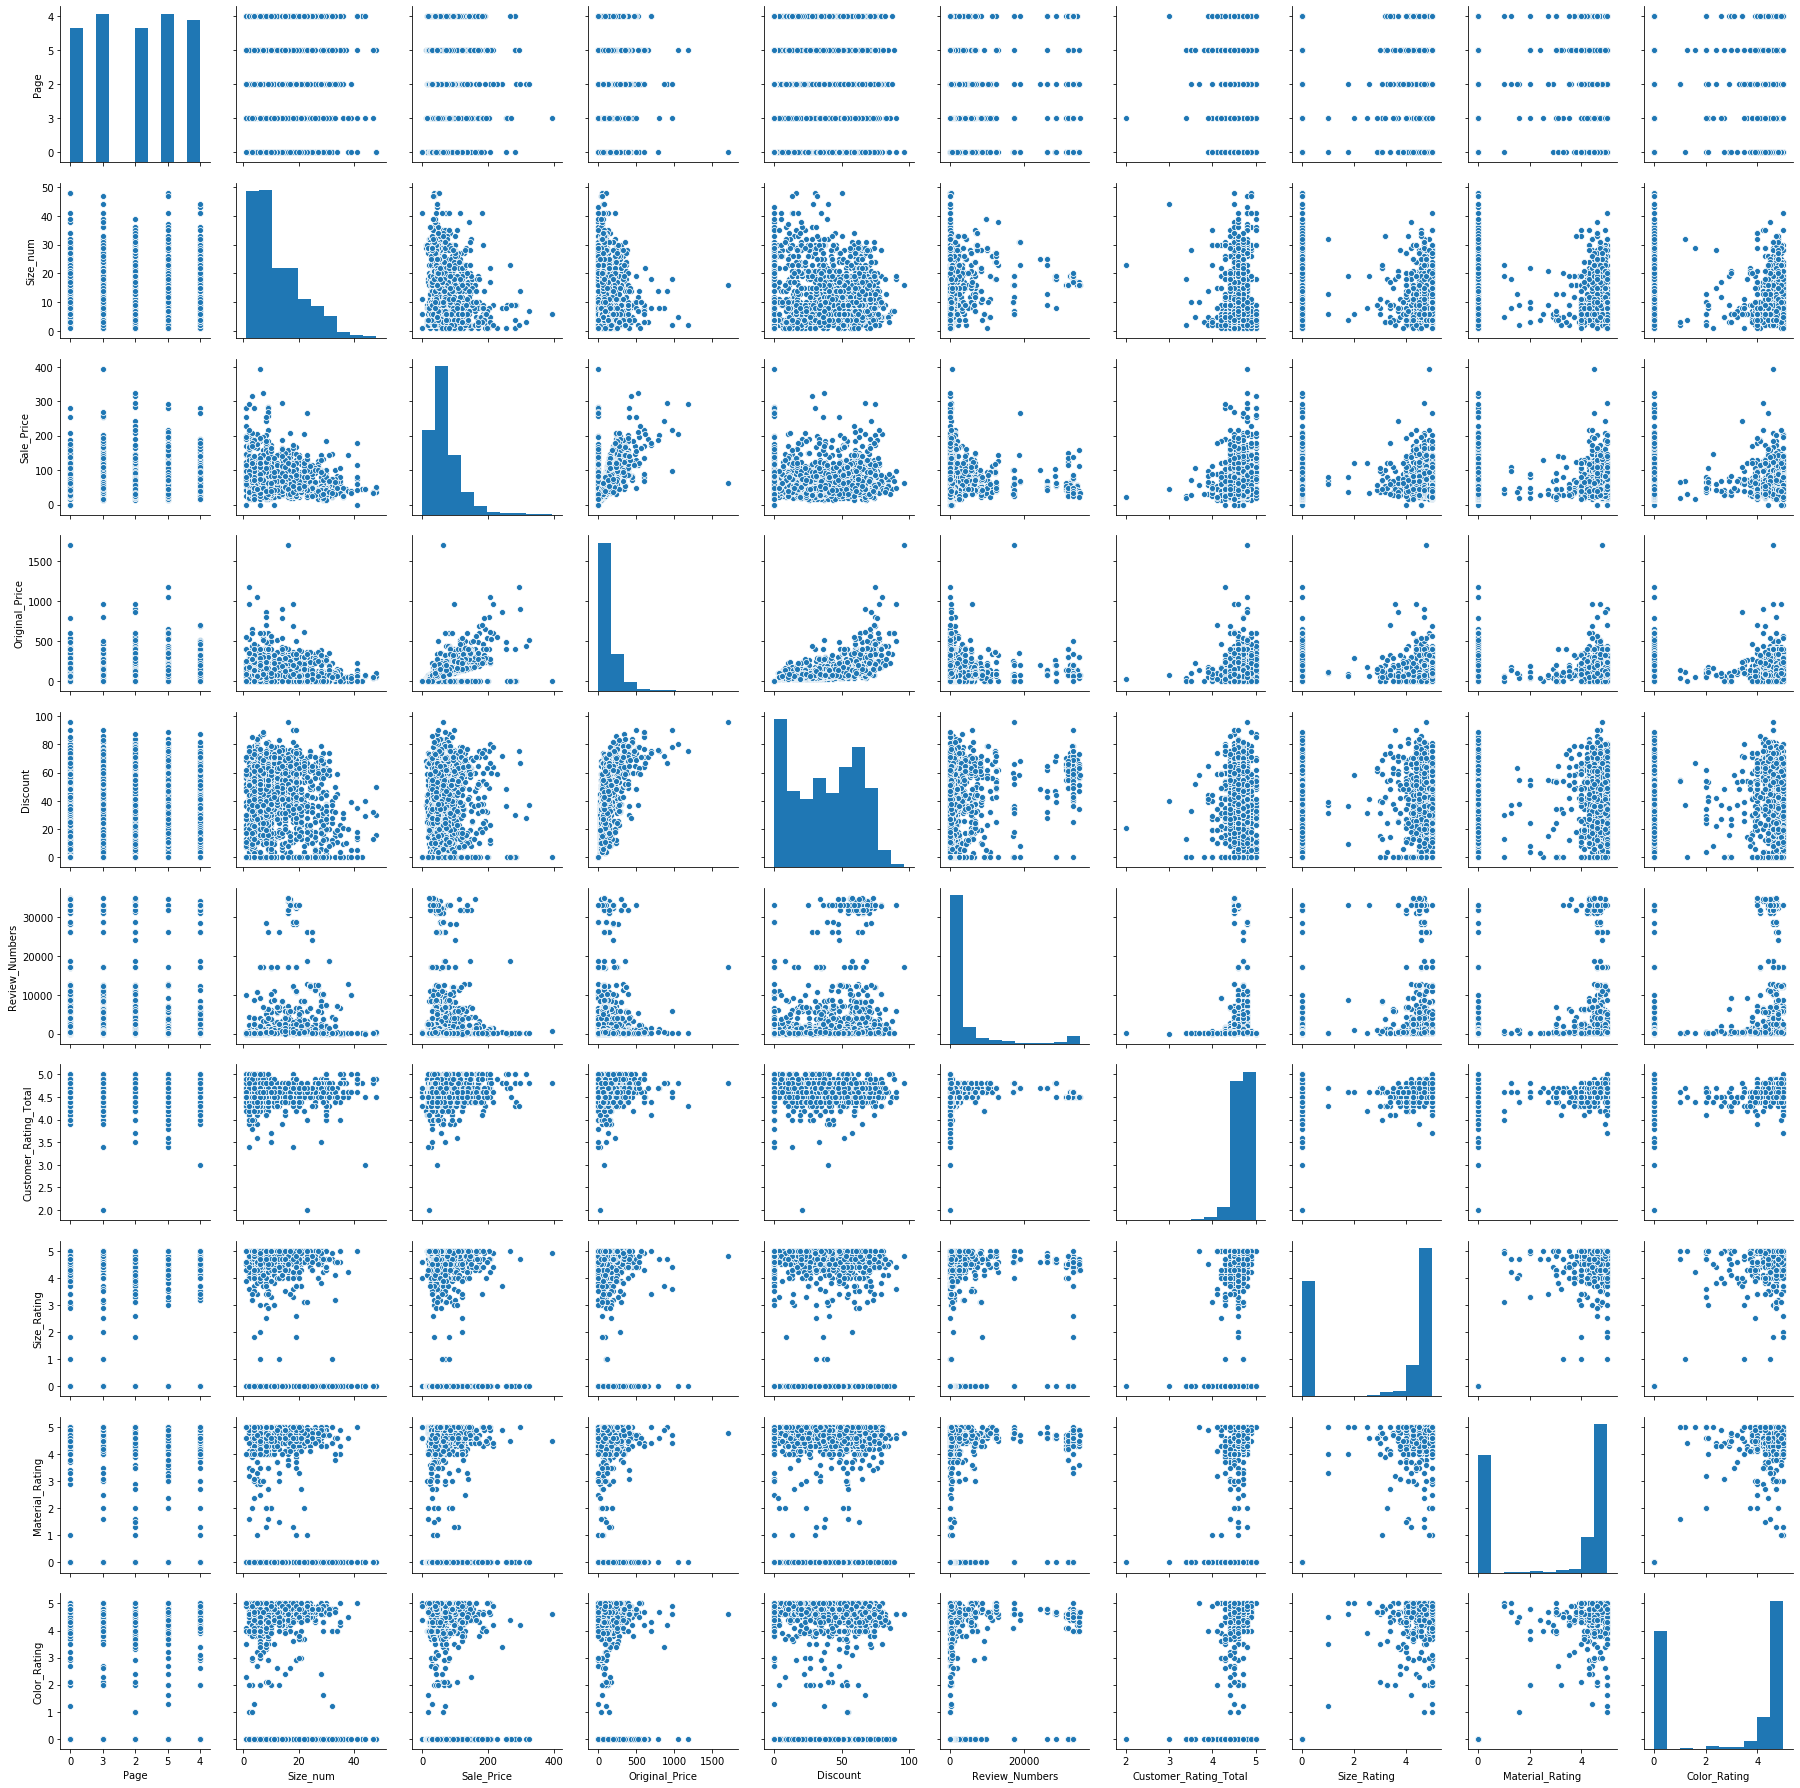

In [44]:
sns.pairplot(num_data)

In [45]:
num_data.corr()

Size_num  Sale_Price  Original_Price  Discount  \
Size_num               1.000000   -0.143127       -0.075228 -0.004749   
Sale_Price            -0.143127    1.000000        0.559016  0.052352   
Original_Price        -0.075228    0.559016        1.000000  0.648403   
Discount              -0.004749    0.052352        0.648403  1.000000   
Review_Numbers         0.232887   -0.083253        0.049973  0.222671   
Customer_Rating_Total -0.000375    0.131105        0.075023  0.011682   
Size_Rating            0.158383   -0.022596        0.155965  0.302653   
Material_Rating        0.161536   -0.014179        0.168428  0.309573   
Color_Rating           0.164080   -0.017501        0.165077  0.305868   

                       Review_Numbers  Customer_Rating_Total  Size_Rating  \
Size_num                     0.232887              -0.000375     0.158383   
Sale_Price                  -0.083253               0.131105    -0.022596   
Original_Price               0.049973               0.075023     0.155965   
Discount                     0.222671               0.011682     0.302653   
Review_Numbers               1.000000              -0.027547     0.252314   
Customer_Rating_Total       -0.027547               1.000000     0.068906   
Size_Rating                  0.252314               0.068906     1.000000   
Material_Rating              0.260307               0.075870     0.975692   
Color_Rating                 0.265053               0.080710     0.974331   

                       Material_Rating  Color_Rating  
Size_num                      0.161536      0.164080  
Sale_Price                   -0.014179     -0.017501  
Original_Price                0.168428      0.165077  
Discount                      0.309573      0.305868  
Review_Numbers                0.260307      0.265053  
Customer_Rating_Total         0.075870      0.080710  
Size_Rating                   0.975692      0.974331  
Material_Rating               1.000000      0.971224  
Color_Rating                  0.971224      1.000000

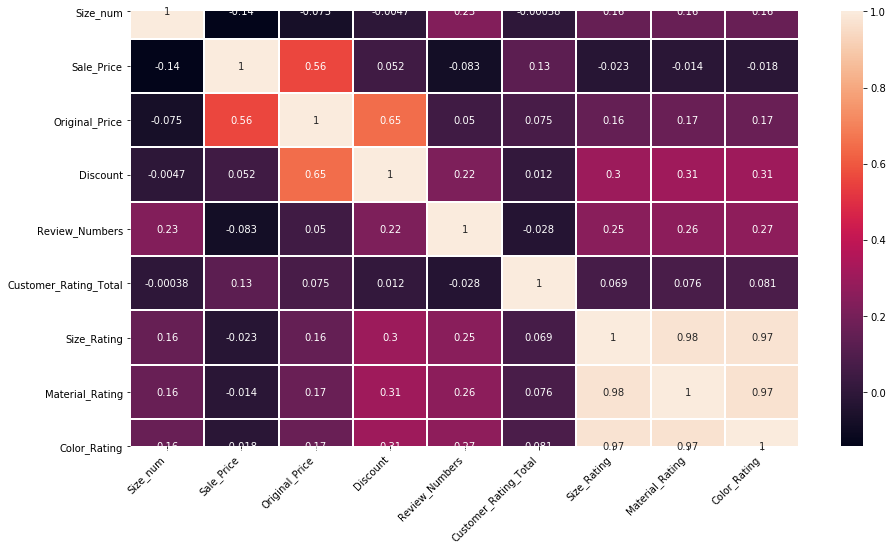

In [46]:
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(num_data.corr(), annot=True,  linewidths=1, ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Explore Reveiw Data 

In [47]:
final_data.columns.tolist()

['Product_Name',
 'Shop_Name',
 'Description',
 'Sponsor',
 'Type',
 'Product_C-href',
 'Page',
 'Size_num',
 'Sale_Price',
 'Original_Price',
 'Discount',
 'Review_Numbers',
 'Customer_Rating_Total',
 'Size_Rating',
 'Material_Rating',
 'Color_Rating',
 'Sale_Price_Range',
 'Original_Price_Range',
 'Discount_Range',
 'Review_Range']

### Sponsored Products Analytics

In [48]:
fig = px.scatter(final_data, x='Sale_Price', y='Customer_Rating_Total', size='Review_Numbers', color='Sponsor',
                 hover_name='Product_Name', log_x=True, size_max=40)
fig.show()

https://www.rsgsales.com/new-blog/wayfairsponsoredproducts

In [49]:
# from this chart, we could observe that most of the product with more reviews appear in the range between 40$ and 180$,
# and all of these products rating by the customer arount 4.6.

In [50]:
# for this part below is trying to understand the attributes for the product that we currently have
# that our competitors selected to sponsor

In [51]:
sponsor_product_dataset = final_data.loc[final_data['Sponsor'] == 'Sponsored']
sponsor_product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 15 to 236
Data columns (total 20 columns):
Product_Name             136 non-null object
Shop_Name                136 non-null object
Description              136 non-null object
Sponsor                  136 non-null object
Type                     136 non-null object
Product_C-href           136 non-null object
Page                     136 non-null category
Size_num                 136 non-null float64
Sale_Price               136 non-null float64
Original_Price           136 non-null float64
Discount                 136 non-null float64
Review_Numbers           136 non-null float64
Customer_Rating_Total    136 non-null float64
Size_Rating              136 non-null float64
Material_Rating          136 non-null float64
Color_Rating             136 non-null float64
Sale_Price_Range         136 non-null category
Original_Price_Range     136 non-null category
Discount_Range           136 non-null category
Review_Range          

In [52]:
# Shop_Name
Shop_Name = pd.DataFrame(sponsor_product_dataset['Shop_Name'].value_counts()).reset_index()
Shop_Name.rename(columns = {'index':'Shop_Name','Shop_Name':'Count'},inplace = True)

wind = Shop_Name
fig = px.bar_polar(wind, r="Count", theta="Shop_Name", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [53]:
# Type
Type = pd.DataFrame(sponsor_product_dataset['Type'].value_counts()).reset_index()
Type.rename(columns = {'index':'Type','Type':'Count'},inplace = True)

In [54]:
wind = Type
fig = px.bar_polar(wind, r="Count", theta="Type", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [55]:
# Page
Page = pd.DataFrame(sponsor_product_dataset['Page'].value_counts()).reset_index()
Page.rename(columns = {'index':'Page','Page':'Count'},inplace = True)
Page['Page'].astype('category')


Page.replace(['0', '4', '3', '2', '5'], ['One','TWO','THREE','FOUR','FIVE'],inplace = True)

In [56]:
Page.Page.values.tolist()

['One', 'TWO', 'THREE', 'FOUR', 'FIVE']

In [57]:
wind = Page
fig = px.bar_polar(wind, r="Count", theta="Page", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [58]:
# Discount_Range
Discount_Range = pd.DataFrame(sponsor_product_dataset['Discount_Range'].value_counts()).reset_index()
Discount_Range.rename(columns = {'index':'Discount_Range','Discount_Range':'Count'},inplace = True)
Discount_Range['Discount_Range'] = Discount_Range['Discount_Range'].astype(str)

In [59]:
wind = Discount_Range
fig = px.bar_polar(wind, r="Count", theta="Discount_Range", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [60]:
# Size_num
Size_num = pd.DataFrame(sponsor_product_dataset['Size_num'].value_counts()).reset_index()
Size_num.rename(columns = {'index':'Size_num','Size_num':'Count'},inplace = True)
Size_num['Size_num'] = Size_num['Size_num'].apply(lambda x : str([x]))

In [61]:
wind = Size_num
fig = px.bar_polar(wind, r="Count", theta="Size_num", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [62]:
# Sale_Price_Range
Sale_Price_Range = pd.DataFrame(sponsor_product_dataset['Sale_Price_Range'].value_counts()).reset_index()
Sale_Price_Range.rename(columns = {'index':'Sale_Price_Range','Sale_Price_Range':'Count'},inplace = True)
Sale_Price_Range['Sale_Price_Range'] = Sale_Price_Range['Sale_Price_Range'].astype(str)

In [63]:
wind = Sale_Price_Range
fig = px.bar_polar(wind, r="Count", theta="Sale_Price_Range", template="plotly_white",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

### Page/Type/Reviews Analytics

In [64]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='0']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='0']['Type'],
    name='Page 1',
    marker_color='maroon'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='2']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='2']['Type'],
    name='Page 2',
    marker_color='lightgoldenrodyellow'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='3']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='3']['Type'],
    name='Page 3',
    marker_color='lightskyblue'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='4']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='4']['Type'],
    name='Page 4',
    marker_color='mediumseagreen'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='5']['Review_Numbers'],
    y=final_data.loc[final_data['Page']=='5']['Type'],
    name='Page 5',
    marker_color='orangered'
))


fig.update_layout(
    xaxis=dict(title='Review_Numbers', zeroline=False),
    boxmode='group',
    autosize=False,
    width=800,
    height=900
)

fig.update_traces(orientation='h')
fig.show()

In [65]:
# observe that higher page have more reveiws
# Customer preper to purchase Round/Orient/Area rugs in the Wayfair

### Page/Type/Rating Analytics

In [66]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='0']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='0']['Type'],
    name='Page 1',
    marker_color='maroon'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='2']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='2']['Type'],
    name='Page 2',
    marker_color='lightgoldenrodyellow'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='3']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='3']['Type'],
    name='Page 3',
    marker_color='lightskyblue'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='4']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='4']['Type'],
    name='Page 4',
    marker_color='mediumseagreen'
))

fig.add_trace(go.Box(
    x=final_data.loc[final_data['Page']=='5']['Customer_Rating_Total'],
    y=final_data.loc[final_data['Page']=='5']['Type'],
    name='Page 5',
    marker_color='orangered'
))


fig.update_layout(
    xaxis=dict(title='Customer_Rating_Total', zeroline=False),
    boxmode='group',
    autosize=False,
    width=800,
    height=900
)

fig.update_traces(orientation='h') 
fig.show()

### Type/Review Number/Sales/Discount

In [67]:
fig = px.scatter_3d(final_data, x='Discount', y='Sale_Price', z='Review_Numbers',
              color='Type', opacity=0.4)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### Shop Name Analytics

[Text(0, 0, 'Mercury Row'),
 Text(0, 0, 'Andover Mills'),
 Text(0, 0, 'Bungalow Rose'),
 Text(0, 0, 'Three Posts'),
 Text(0, 0, 'Mistana'),
 Text(0, 0, 'Union Rustic'),
 Text(0, 0, 'Laurel Foundry Modern Farmhouse'),
 Text(0, 0, 'Charlton Home'),
 Text(0, 0, 'Beachcrest Home'),
 Text(0, 0, 'Wade Logan'),
 Text(0, 0, 'Fleur De Lis Living'),
 Text(0, 0, 'Ophelia & Co.'),
 Text(0, 0, 'Winston Porter'),
 Text(0, 0, 'Canora Grey'),
 Text(0, 0, 'House of Hampton'),
 Text(0, 0, 'Sol 72 Outdoor'),
 Text(0, 0, 'Greyleigh'),
 Text(0, 0, 'Lark Manor'),
 Text(0, 0, 'Willa Arlo Interiors'),
 Text(0, 0, 'Trent Austin Design'),
 Text(0, 0, 'Bloomsbury Market'),
 Text(0, 0, 'Zipcode Design'),
 Text(0, 0, 'Ebern Designs'),
 Text(0, 0, 'World Menagerie'),
 Text(0, 0, 'Hashtag Home'),
 Text(0, 0, 'Zoomie Kids'),
 Text(0, 0, 'Safavieh'),
 Text(0, 0, 'Red Barrel Studio'),
 Text(0, 0, 'Orren Ellis'),
 Text(0, 0, 'Highland Dunes'),
 Text(0, 0, 'Astoria Grand'),
 Text(0, 0, 'Modern Rustic Interiors'),
 Text(0

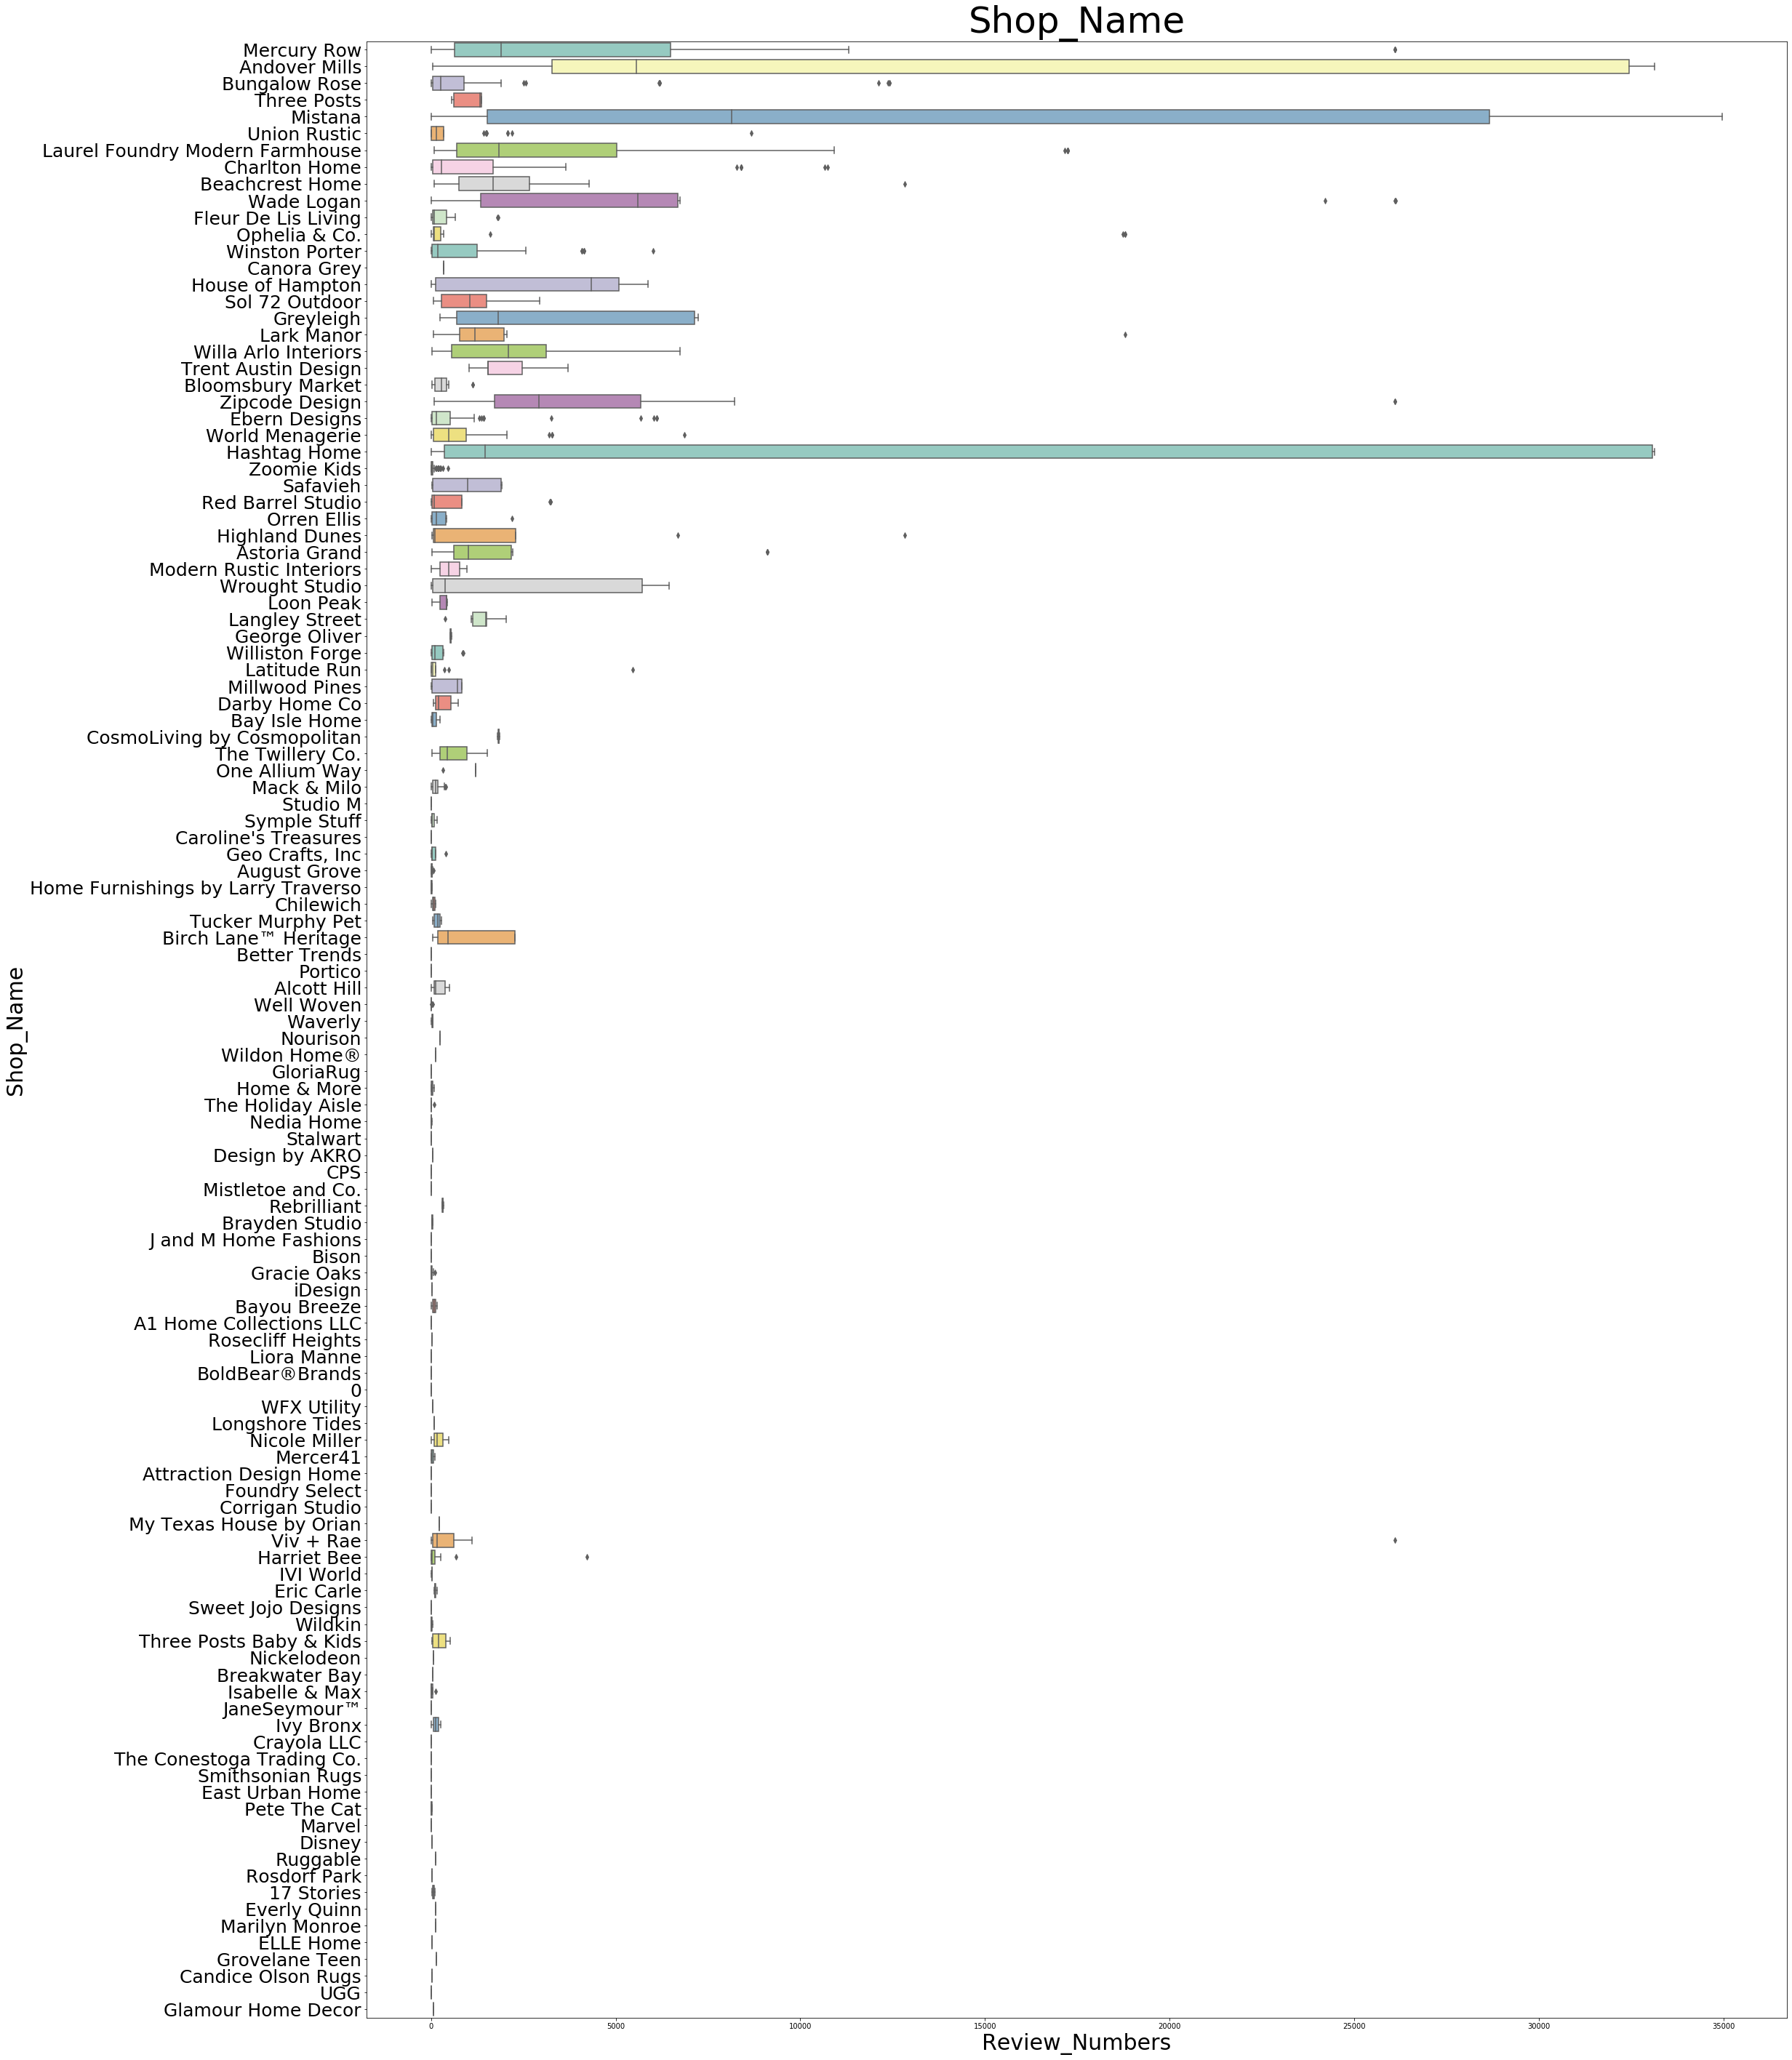

In [68]:
plt.figure(figsize=(35,50))
b=sns.boxplot(x='Review_Numbers', y='Shop_Name', palette="Set3", data=final_data)
b.axes.set_title('Shop_Name',fontsize=50)
b.set_xlabel('Review_Numbers',fontsize=30)
b.set_ylabel('Shop_Name',fontsize=30)
b.set_yticklabels(b.get_yticklabels(),fontsize = 25)

### Sale_Price Analytics

[Text(0, 0, '(-0.001, 31.447]'),
 Text(0, 0, '(31.447, 40.99]'),
 Text(0, 0, '(40.99, 47.99]'),
 Text(0, 0, '(47.99, 62.99]'),
 Text(0, 0, '(62.99, 79.99]'),
 Text(0, 0, '(79.99, 107.99]'),
 Text(0, 0, '(107.99, 392.99]')]

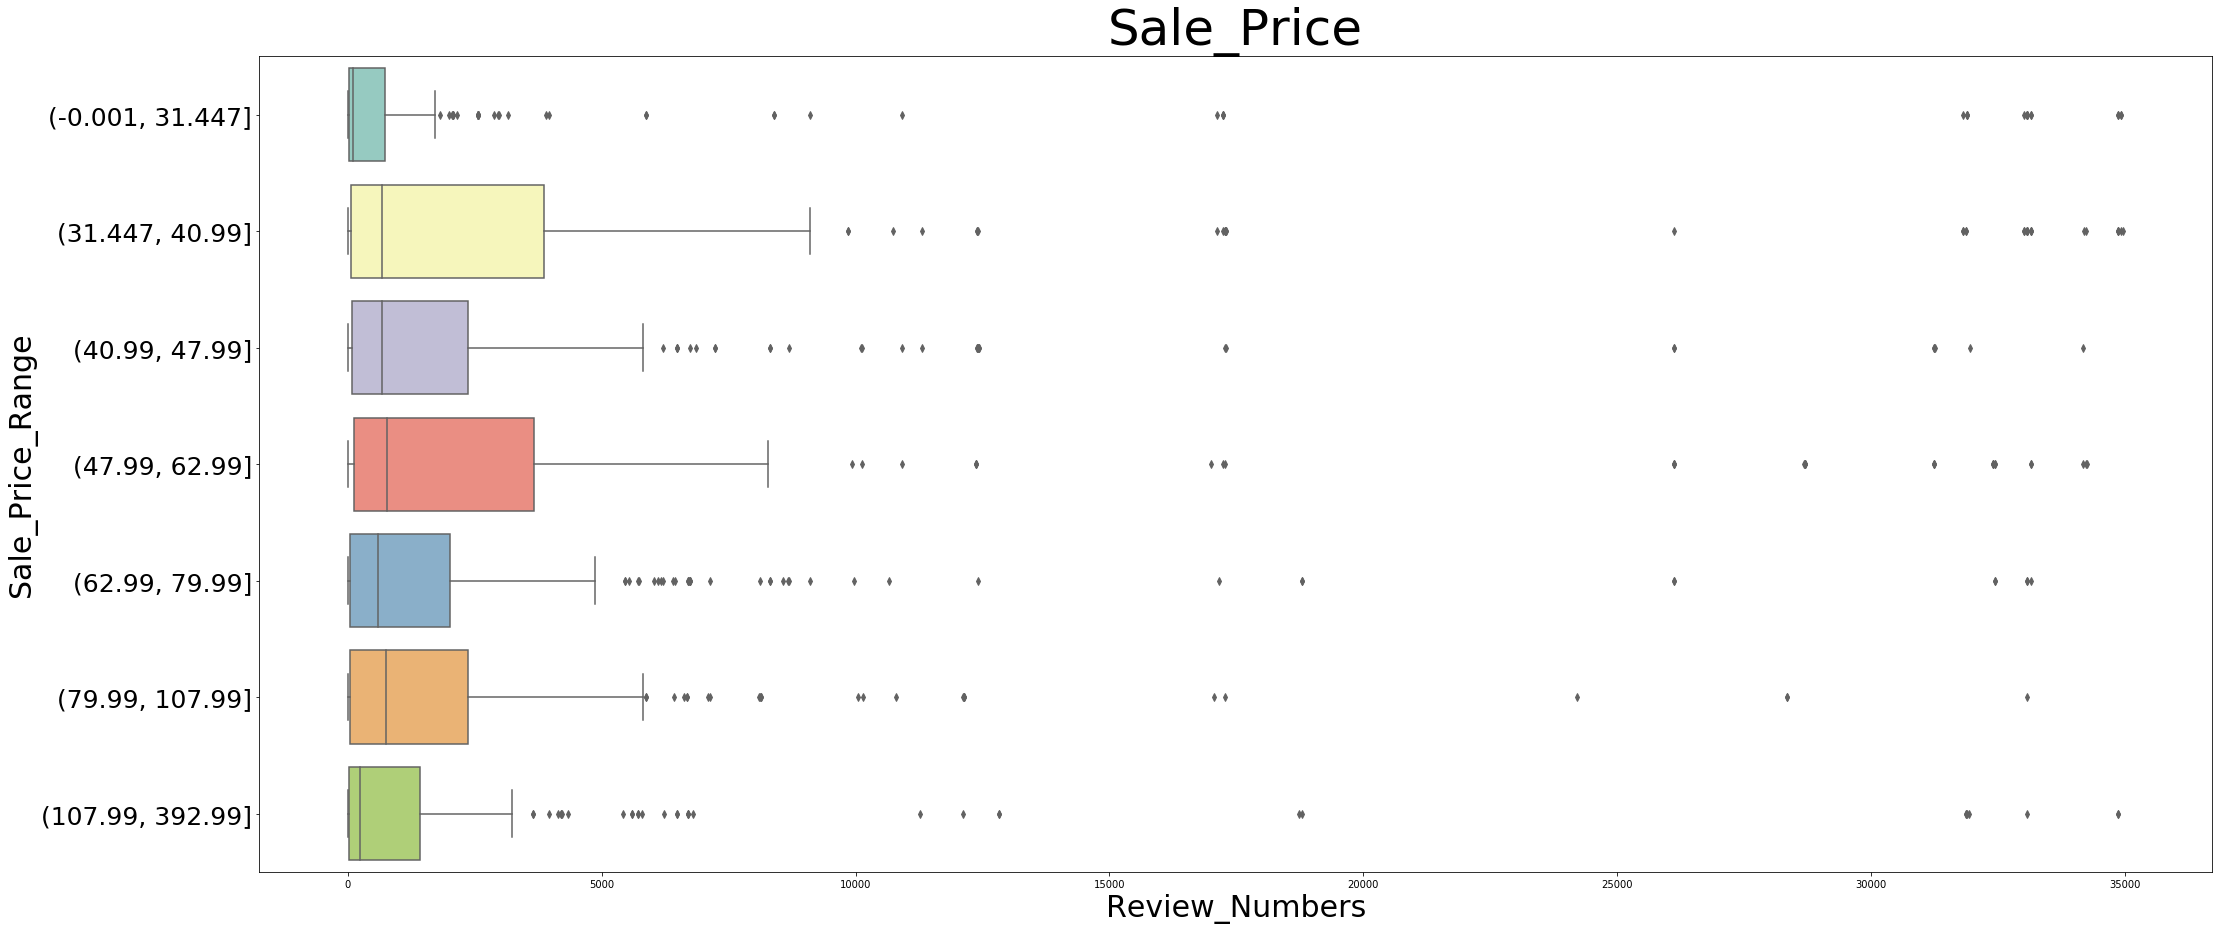

In [69]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Review_Numbers', y='Sale_Price_Range', palette="Set3", data=final_data)
b.axes.set_title("Sale_Price",fontsize=50)
b.set_xlabel("Review_Numbers",fontsize=30)
b.set_ylabel("Sale_Price_Range",fontsize=30)
b.set_yticklabels(b.get_yticklabels(),fontsize = 25)

### Discount Analytics

In [70]:
pd.Series(final_data['Sale_Price_Range']).describe

<bound method NDFrame.describe of 0        (62.99, 79.99]
1        (47.99, 62.99]
2      (107.99, 392.99]
3        (62.99, 79.99]
4       (79.99, 107.99]
             ...       
232     (79.99, 107.99]
233      (62.99, 79.99]
234      (62.99, 79.99]
235     (31.447, 40.99]
236      (62.99, 79.99]
Name: Sale_Price_Range, Length: 1600, dtype: category
Categories (7, interval[float64]): [(-0.001, 31.447] < (31.447, 40.99] < (40.99, 47.99] < (47.99, 62.99] < (62.99, 79.99] < (79.99, 107.99] < (107.99, 392.99]]>

[Text(0, 0, "[Interval(-0.001, 5.5, closed='right')]"),
 Text(0, 0, "[Interval(5.5, 24.0, closed='right')]"),
 Text(0, 0, "[Interval(24.0, 39.0, closed='right')]"),
 Text(0, 0, "[Interval(39.0, 54.0, closed='right')]"),
 Text(0, 0, "[Interval(54.0, 65.0, closed='right')]"),
 Text(0, 0, "[Interval(65.0, 96.0, closed='right')]")]

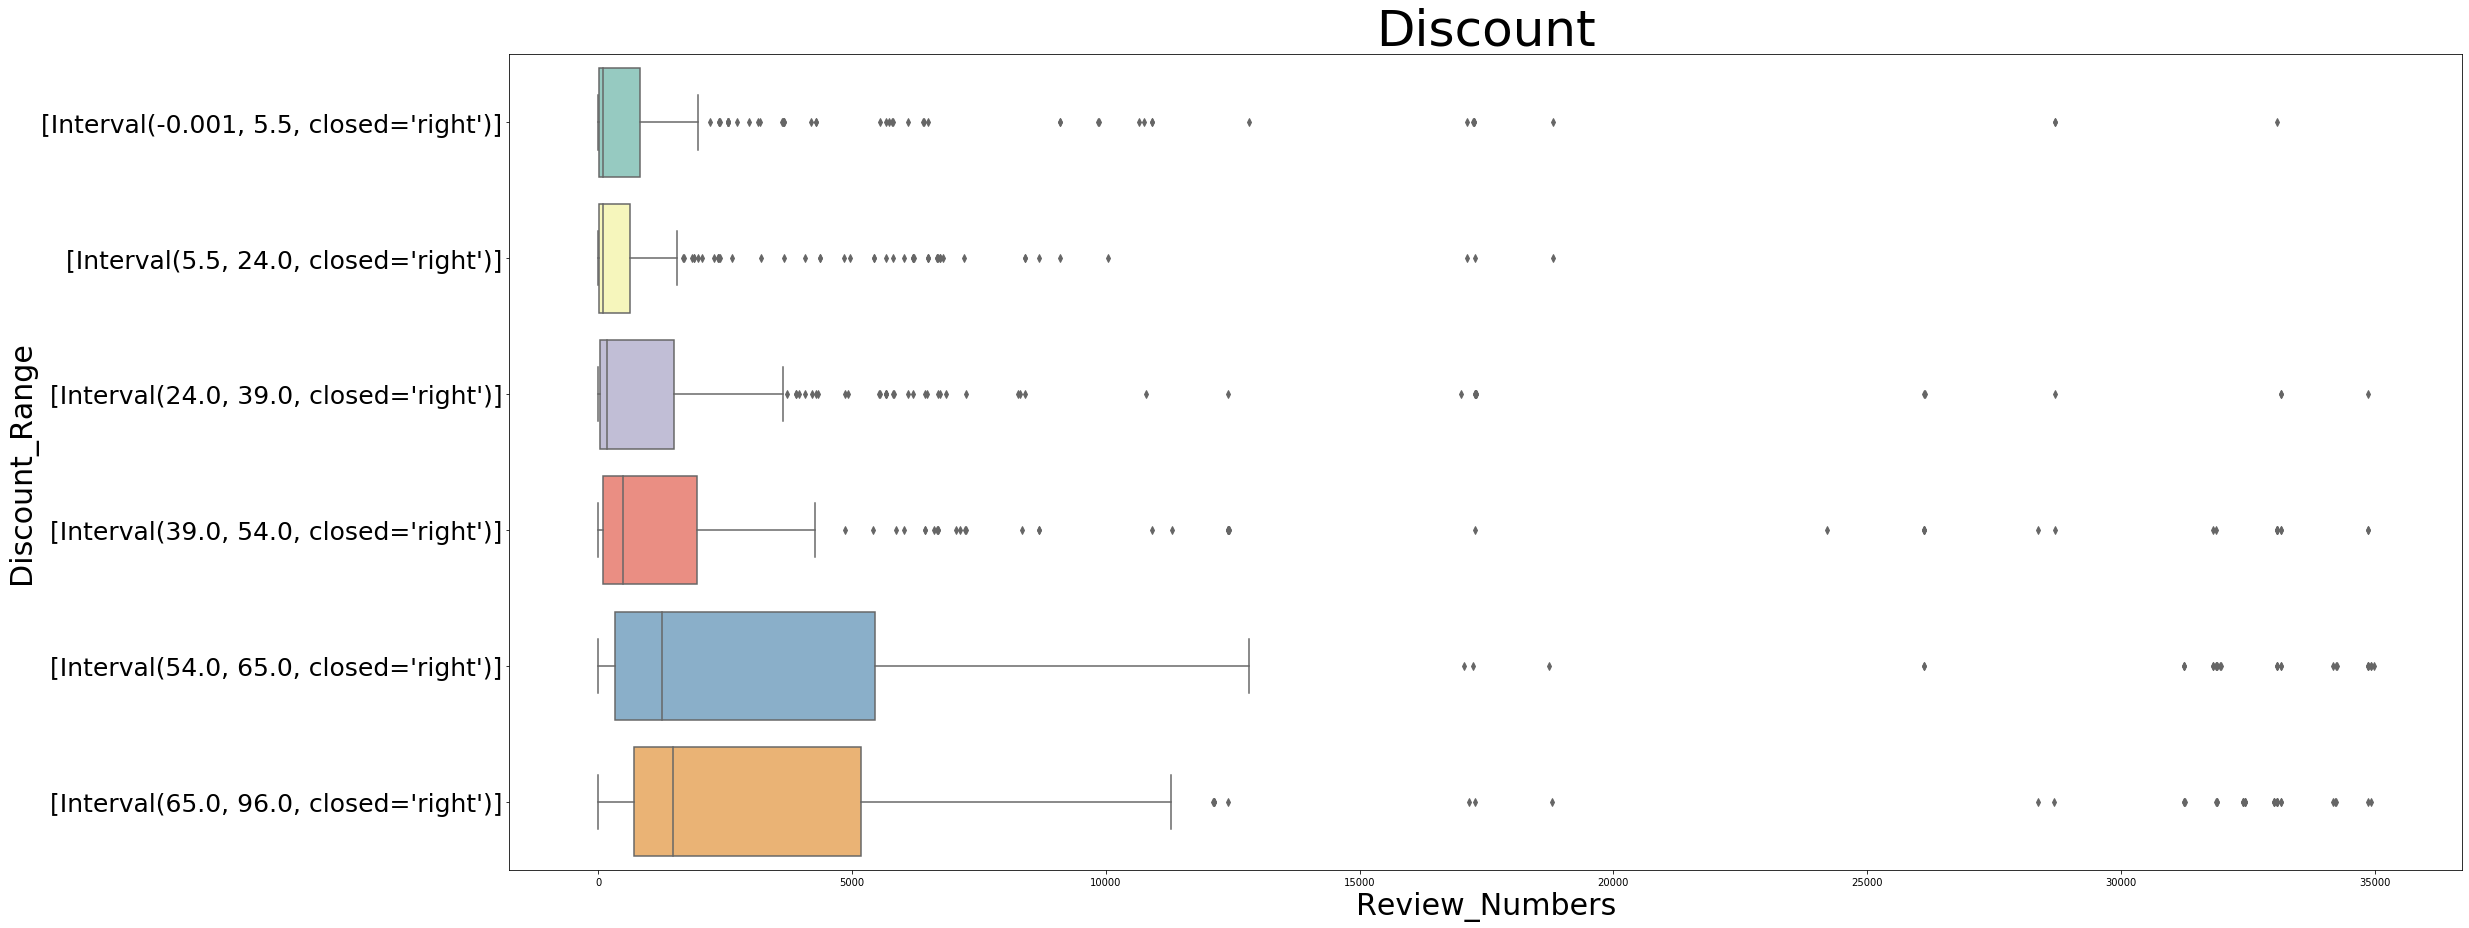

In [71]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Review_Numbers', y='Discount_Range', palette="Set3", data=final_data)
b.axes.set_title("Discount",fontsize=50)
b.set_xlabel("Review_Numbers",fontsize=30)
b.set_ylabel("Discount_Range",fontsize=30)
b.set_yticklabels(b.get_yticklabels(),fontsize = 25)

### Size_num 

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

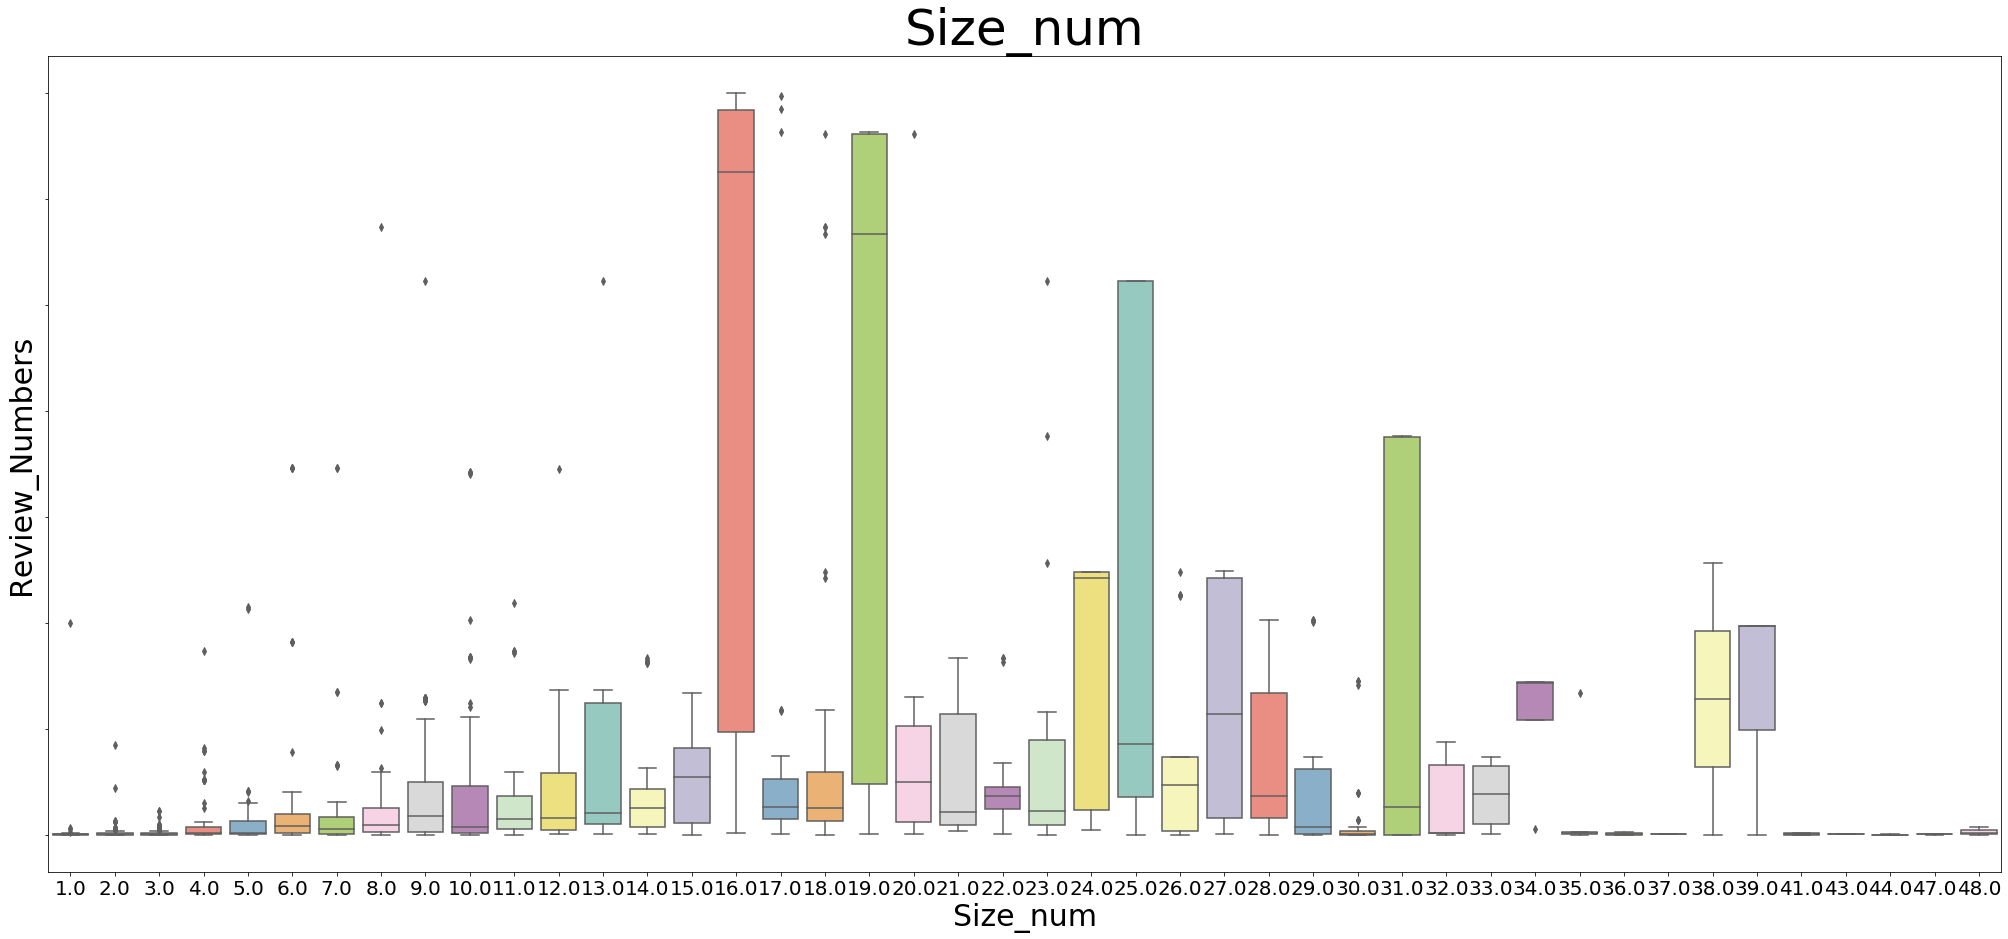

In [72]:
plt.figure(figsize=(35,15))
b=sns.boxplot(x='Size_num', y='Review_Numbers', palette="Set3", data=final_data)
b.axes.set_title("Size_num",fontsize=50)
b.set_xlabel("Size_num",fontsize=30)
b.set_ylabel("Review_Numbers",fontsize=30)
b.set_xticklabels(b.get_xticklabels(),fontsize = 20)
b.set_yticklabels(b.get_yticklabels(),fontsize = 20)

In [73]:
final_data.loc[final_data['Size_num'] == 3][['Type','Review_Numbers']]

Type  Review_Numbers
47   Area             0.0
54   Area             7.0
91   Area          1124.0
163  Area           306.0
185  Area           423.0
..    ...             ...
155  Shag             0.0
177  Shag           277.0
182  Shag             6.0
183  Shag             0.0
199  Shag            33.0

[111 rows x 2 columns]

###### 以上結論可以再深入挖掘，比如看到了sponsored的產品比較少，review也比較小，看這些是什麽產品，爲什麽review會比較少

# Text Analytics

## Product Description

### value keywords with higher values

In [74]:
import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer         

In [75]:
text_classification_data  = final_data[['Description','Review_Numbers']]

In [76]:
#lower the case
text_classification_data['Description'] = text_classification_data['Description'].str.lower()
text_classification_data['Description'].fillna(value = 'N/A',inplace =True)
#tokenization
text_classification_data['Description'] = text_classification_data.apply(lambda row: nltk.word_tokenize(row["Description"]), axis=1)
#filter out stopwords
stops = set(stopwords.words("english")) 
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [item for item in x if item not in stops])
#remove punctuation
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [item for item in x if item not in string.punctuation])
#Stemming
stemmer = SnowballStemmer("english")
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [stemmer.stem(y) for y in x])
#Lemitization
lemmatizer = WordNetLemmatizer() 
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
#Extract words from list for each row
text_classification_data['Description'] = text_classification_data['Description'].apply(lambda x: ','.join(x))

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [77]:
text_classification_data.reset_index(inplace = True)
text_classification_data.columns.tolist()
text_classification_data

index                                        Description  Review_Numbers
0         0  tast,tousl,shag,area,rug,showcas,geometr,diamo...          8574.0
1         1  warm-up,hardwood,tile,floor,provid,stylish,acc...          5180.0
2         2  soft,touch,allur,distinct,high-low,textur,rayo...          1417.0
3         3  anyth,el,area,rug,art,floor,creat,mood,decor,g...           607.0
4         4  bright,tone,distress,persian-inspir,pattern,ar...         12136.0
...     ...                                                ...             ...
1595    232                                                n/a            20.0
1596    233  want,luxuri,sheep,hide,like,anim,product,faux,...            54.0
1597    234  multi-textur,shag,area,rug,lend,retro,vibe,mod...             9.0
1598    235  readi,stand,high,foot,traffic,entryway,take,oc...           284.0
1599    236                                                n/a             9.0

[1600 rows x 3 columns]

In [78]:
keywords = pd.DataFrame(text_classification_data['Description'].str.split(',',expand=True).stack().reset_index(level = 1,drop=True).rename('keywords'))
keywords.reset_index(inplace = True)
keywords

index keywords
0          0     tast
1          0    tousl
2          0     shag
3          0     area
4          0      rug
...      ...      ...
64226   1598      hue
64227   1598   yellow
64228   1598      red
64229   1598     blue
64230   1599      n/a

[64231 rows x 2 columns]

In [79]:
keyword_2 = keywords.merge(text_classification_data.drop(columns = 'Description'), how = 'left',left_on = 'index',right_index =True).drop(columns = ['index_x','index_y'])
keyword_2

keywords  Review_Numbers
0         tast          8574.0
1        tousl          8574.0
2         shag          8574.0
3         area          8574.0
4          rug          8574.0
...        ...             ...
64226      hue           284.0
64227   yellow           284.0
64228      red           284.0
64229     blue           284.0
64230      n/a             9.0

[64231 rows x 2 columns]

In [80]:
keyword_2['len'] = keyword_2.keywords.apply(lambda x: len(str(x)))
keyword_2

keywords  Review_Numbers  len
0         tast          8574.0    4
1        tousl          8574.0    5
2         shag          8574.0    4
3         area          8574.0    4
4          rug          8574.0    3
...        ...             ...  ...
64226      hue           284.0    3
64227   yellow           284.0    6
64228      red           284.0    3
64229     blue           284.0    4
64230      n/a             9.0    3

[64231 rows x 3 columns]

In [81]:
#filter out digital values
keyword_3 = keyword_2.loc[keyword_2['keywords'].str.contains('\d', regex=True) == False]

In [82]:
#groupby keywords
keywords_final = keyword_3.loc[keyword_3['len'] >2].groupby('keywords').agg({'Review_Numbers':['mean', 'count']})
keywords_final

Review_Numbers      
                   mean count
keywords                     
...           62.000000     2
abaca        122.000000     1
abbrevi        4.000000     3
abc           75.375000     8
abil          22.000000     2
...                 ...   ...
zesti         51.000000     1
zigzag       412.500000     2
zone         195.000000     1
zoo           79.333333     3
zoomi         37.714286     7

[3005 rows x 2 columns]

In [83]:
#rename column name
keywords_final.columns = keywords_final.columns.get_level_values(0)
keywords_final.columns = ['Review_Numbers_Mean','Review_Numbers_Count']
keywords_final.reset_index(inplace = True)
keywords_final

keywords  Review_Numbers_Mean  Review_Numbers_Count
0         ...            62.000000                     2
1       abaca           122.000000                     1
2     abbrevi             4.000000                     3
3         abc            75.375000                     8
4        abil            22.000000                     2
...       ...                  ...                   ...
3000    zesti            51.000000                     1
3001   zigzag           412.500000                     2
3002     zone           195.000000                     1
3003      zoo            79.333333                     3
3004    zoomi            37.714286                     7

[3005 rows x 3 columns]

In [84]:
#tfidf value for each keyword
keywords_final['Log_value'] = keywords_final['Review_Numbers_Mean']*np.log(3005/keywords_final['Review_Numbers_Count'])

In [85]:
#Top 20 valuable keywords
keywords_final.loc[keywords_final['Review_Numbers_Count']>10].sort_values(by=['Log_value','Review_Numbers_Count'], ascending=False).head(60)

keywords  Review_Numbers_Mean  Review_Numbers_Count  \
334             burst         23677.615385                    13   
600           current         16687.000000                    11   
2654            theme         14027.166667                    12   
567             crave         14238.588235                    17   
403             chang         14936.500000                    22   
278           boho-ch         15052.882353                    34   
1154             guid         13107.400000                    20   
971              flea         11976.785714                    14   
2092            rebel         12078.625000                    16   
1211             heat         13242.115385                    26   
999            follow         12186.400000                    20   
1024      free-spirit         11469.125000                    16   
670            deterg         11291.250000                    16   
1672             morn         13293.625000                    40   
793               end         13075.463415                    41   
1631             mild         10632.823529                    17   
1671             mood         11339.230769                    26   
2330             show         10983.291667                    24   
914   fashion-forward          9597.000000                    12   
24                act         10295.423077                    26   
2730          tremont          8850.285714                    14   
675               dig         11730.166667                    54   
181              bare          9885.230769                    26   
457             cloud          8347.916667                    12   
717            dramat          9794.551724                    29   
1825           outfit          8565.866667                    15   
2794         unexpect          8228.866667                    15   
2299           shaggi          9780.277778                    36   
100             anyth          8789.090909                    22   
1366         introduc          7704.583333                    12   
1445           layout          9212.967742                    31   
835         establish          9425.514286                    35   
476             cohes          8329.400000                    20   
2919        well-worn          8334.142857                    21   
1500         lived-in          7692.357143                    14   
2280            separ          7760.937500                    16   
2418             sold          7760.937500                    16   
2627             taup          8104.950000                    20   
2044             pure          7556.428571                    14   
2479           stabil          8340.033333                    30   
211               bed          9680.982759                    58   
897             fade-          9128.608696                    46   
948              find          8326.303030                    33   
1582           market          7631.909091                    22   
2709         traction          8388.857143                    35   
1049         furnitur          8231.416667                    36   
1098           global          6936.058824                    17   
756     easy-to-clean          7509.576923                    26   
949              fine          6927.000000                    19   
1868             part          7786.588235                    34   
277              boho          7984.650000                    40   
952            finish          8163.956522                    46   
2664           though          7531.500000                    34   
2346           silver          6527.100000                    20   
312              brim          5987.153846                    13   
96             antiqu          7548.975610                    41   
2233           scheme          7427.075000                    40   
2163            right          8527.028571                    70   
3

### Words Cloud

In [86]:
from wordcloud import WordCloud

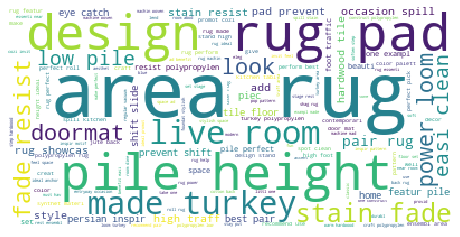

In [87]:
# Start with one review:
text = ' '.join(text_classification_data['Description'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Model Building

In [88]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

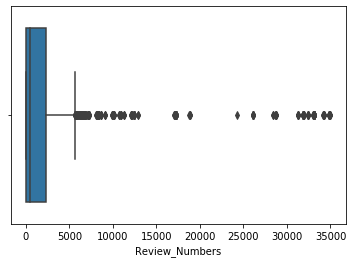

In [89]:
sns.boxplot(text_classification_data['Review_Numbers'])

In [90]:
text_classification_data.describe()

index  Review_Numbers
count  1600.000000     1600.000000
mean    114.126875     3310.350625
std      66.357350     7424.206676
min       0.000000        0.000000
25%      57.000000       42.000000
50%     114.000000      453.500000
75%     171.000000     2266.000000
max     236.000000    34975.000000

In [91]:
text_classification_data.columns.tolist()

['index', 'Description', 'Review_Numbers']

In [92]:
def f(row):
    if row['Review_Numbers'] <= 453.5:
        val = 'Weak'
    elif row['Review_Numbers'] <= 2266:
        val = 'Neutral'
    else:
        val = 'Good'
    return val

In [93]:
text_classification_data['label'] = text_classification_data.apply(f, axis=1)

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
text_classification_data['label'].value_counts()

Weak       800
Neutral    403
Good       397
Name: label, dtype: int64

In [95]:
#split the dataset
sentences = text_classification_data['Description'].values
y = text_classification_data['label'].values
train_x, valid_x, train_y, valid_y = train_test_split(sentences, y, test_size=0.3)

In [96]:
encoder = preprocessing.LabelEncoder()
integerMapping=dict(zip(valid_y,encoder.fit_transform(valid_y)))
integerMapping

{'Weak': 2, 'Good': 0, 'Neutral': 1}

In [97]:
# label encode the target variable 
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [98]:
# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(text_classification_data['Description'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [99]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(text_classification_data['Description'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(text_classification_data['Description'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(text_classification_data['Description'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [100]:
# def function for multilabel confustion_matrix
from sklearn.metrics import multilabel_confusion_matrix
def multiple_matrix(predictions,valida_y):
    mcm = multilabel_confusion_matrix(predictions, valida_y)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    precision = tp/(tp+fp)
    return precision  

In [101]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return multiple_matrix(predictions, valid_y)

In [102]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  [0.75221239 0.53508772 0.80237154]
NB, WordLevel TF-IDF:  [0.7079646  0.38596491 0.84189723]
NB, N-Gram Vectors:  [0.68141593 0.5877193  0.82608696]
NB, CharLevel Vectors:  [0.61061947 0.28947368 0.86956522]


In [103]:
# Deploy NB, Count Vectors which have the accuracy performance as our final model to identify the
# product description is good or not in the short future

In [104]:
# Final Model
clf1 = naive_bayes.MultinomialNB()
clf1.fit(xtrain_count, train_y)
# Apply the Model in the future
clf1.predict(#data)

SyntaxError: unexpected EOF while parsing (<ipython-input-104-d3a56acb23e5>, line 5)

# Product Name

### value keywords with higher values

In [124]:
import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer         

In [125]:
text_classification_data_Name  = final_data[['Product_Name','Review_Numbers']]

In [126]:
#lower the case
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].str.lower()
text_classification_data_Name['Product_Name'].fillna(value = 'N/A',inplace =True)
#tokenization
text_classification_data_Name['Product_Name'] = text_classification_data_Name.apply(lambda row: nltk.word_tokenize(row["Product_Name"]), axis=1)
#filter out stopwords
stops = set(stopwords.words("english")) 
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [item for item in x if item not in stops])
#remove punctuation
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [item for item in x if item not in string.punctuation])
#Stemming
stemmer = SnowballStemmer("english")
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [stemmer.stem(y) for y in x])
#Lemitization
lemmatizer = WordNetLemmatizer() 
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
#Extract words from list for each row
text_classification_data_Name['Product_Name'] = text_classification_data_Name['Product_Name'].apply(lambda x: ','.join(x))

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [127]:
text_classification_data_Name.reset_index(inplace = True)
text_classification_data_Name.columns.tolist()
text_classification_data_Name

index                                    Product_Name  Review_Numbers
0         0                      colona,shag,white,area,rug          8574.0
1         1                          shiflett,gray,area,rug          5180.0
2         2                      fontann,pink/whit,area,rug          1417.0
3         3             acton,ivori,indoor/outdoor,area,rug           607.0
4         4                          tsukiji,orang,area,rug         12136.0
...     ...                                             ...             ...
1595    232             cawley,hand-knot,wool,gray,area,rug            20.0
1596    233      shag,flokati,faux,sheepskin,white,area,rug            54.0
1597    234  lilia,handmad,shag,flokati,wool,ivori,area,rug             9.0
1598    235                                  ivori,area,rug           284.0
1599    236                          vosburg,ivori,area,rug             9.0

[1600 rows x 3 columns]

In [128]:
keywords = pd.DataFrame(text_classification_data_Name['Product_Name'].str.split(',',expand=True).stack().reset_index(level = 1,drop=True).rename('keywords'))
keywords.reset_index(inplace = True)
keywords

index keywords
0         0   colona
1         0     shag
2         0    white
3         0     area
4         0      rug
...     ...      ...
8637   1598      rug
8638   1599  vosburg
8639   1599    ivori
8640   1599     area
8641   1599      rug

[8642 rows x 2 columns]

In [129]:
keyword_2 = keywords.merge(text_classification_data_Name.drop(columns = 'Product_Name'), how = 'left',left_on = 'index',right_index =True).drop(columns = ['index_x','index_y'])
keyword_2

keywords  Review_Numbers
0      colona          8574.0
1        shag          8574.0
2       white          8574.0
3        area          8574.0
4         rug          8574.0
...       ...             ...
8637      rug           284.0
8638  vosburg             9.0
8639    ivori             9.0
8640     area             9.0
8641      rug             9.0

[8642 rows x 2 columns]

In [130]:
keyword_2['len'] = keyword_2.keywords.apply(lambda x: len(str(x)))
keyword_2

keywords  Review_Numbers  len
0      colona          8574.0    6
1        shag          8574.0    4
2       white          8574.0    5
3        area          8574.0    4
4         rug          8574.0    3
...       ...             ...  ...
8637      rug           284.0    3
8638  vosburg             9.0    7
8639    ivori             9.0    5
8640     area             9.0    4
8641      rug             9.0    3

[8642 rows x 3 columns]

In [131]:
#filter out digital values
keyword_3 = keyword_2.loc[keyword_2['keywords'].str.contains('\d', regex=True) == False]
keyword_3

keywords  Review_Numbers  len
0      colona          8574.0    6
1        shag          8574.0    4
2       white          8574.0    5
3        area          8574.0    4
4         rug          8574.0    3
...       ...             ...  ...
8637      rug           284.0    3
8638  vosburg             9.0    7
8639    ivori             9.0    5
8640     area             9.0    4
8641      rug             9.0    3

[8392 rows x 3 columns]

In [136]:
#groupby keywords
keywords_final_name = keyword_3.loc[keyword_3['len'] >2].groupby('keywords').agg({'Review_Numbers':['mean', 'count']})
keywords_final_name

Review_Numbers      
                   mean count
keywords                     
aaliyah        3.000000     1
aaron       1405.200000     5
abagail       61.000000     1
abbevill    1540.666667    21
abbey         23.000000     1
...                 ...   ...
zigzagg       45.000000     1
zlatkus       24.000000     1
zoo           62.666667     3
zosia        300.000000     2
zuniga      1166.000000     2

[1563 rows x 2 columns]

In [137]:
#rename column name
keywords_final_name.columns = keywords_final_name.columns.get_level_values(0)
keywords_final_name.columns = ['Review_Numbers_Mean','Review_Numbers_Count']
keywords_final_name.reset_index(inplace = True)
keywords_final_name

keywords  Review_Numbers_Mean  Review_Numbers_Count
0      aaliyah             3.000000                     1
1        aaron          1405.200000                     5
2      abagail            61.000000                     1
3     abbevill          1540.666667                    21
4        abbey            23.000000                     1
...        ...                  ...                   ...
1558   zigzagg            45.000000                     1
1559   zlatkus            24.000000                     1
1560       zoo            62.666667                     3
1561     zosia           300.000000                     2
1562    zuniga          1166.000000                     2

[1563 rows x 3 columns]

In [138]:
#tfidf value for each keyword
keywords_final_name['Log_value'] = keywords_final_name['Review_Numbers_Mean']*np.log(1563/keywords_final_name['Review_Numbers_Count'])

In [139]:
#Top 20 valuable keywords
keywords_final_name.loc[keywords_final_name['Review_Numbers_Count']>10].sort_values(by=['Log_value','Review_Numbers_Count'], ascending=False).head(30)

keywords  Review_Numbers_Mean  Review_Numbers_Count      Log_value
875        lilah         32935.176471                    17  148904.839716
244       brandt         28116.720930                    43  101027.939249
748       indira         10283.666667                    12   50075.859068
282     burgundi         10342.461538                    13   49534.319465
187        black         11344.814815                    27   46043.219815
210   blue/ivori          7387.454545                    11   36615.675094
1058       orang          7051.416667                    12   34336.560944
251       bright          7336.600000                    15   34088.133568
438         dark          8350.795918                    49   28914.981871
722      hillsbi          7051.448276                    29   28114.593200
762   ivory/gray          5171.133333                    15   24026.699529
872        light          6788.636364                    55   22721.763765
1295      silver          4503.461538                    13   21568.937116
562       floral          4310.125000                    16   19748.016973
156         beig          4818.028571                    35   18303.759291
802         kati          3521.250000                    12   17146.570815
954    medallion          3652.941176                    17   16515.491297
262        brown          4224.031250                    32   16425.679550
1183         red          3954.666667                    30   15633.449651
892         loom          3324.562500                    16   15232.392721
1149       power          3324.562500                    16   15232.392721
1478      vintag          2886.000000                    13   13822.245840
652        green          3034.368421                    19   13381.332156
1543      yellow          2765.117647                    17   12501.508847
1277        shag          4391.780000                   100   12073.847076
677   hand-braid          2652.842105                    19   11698.830347
1404        teal          2492.562500                    16   11420.357079
757        ivori          3744.262500                    80   11129.205083
625         gray          4706.436709                   158   10786.057737
9       abstract          2192.500000                    14   10338.306214

### Words Cloud

In [122]:
from wordcloud import WordCloud

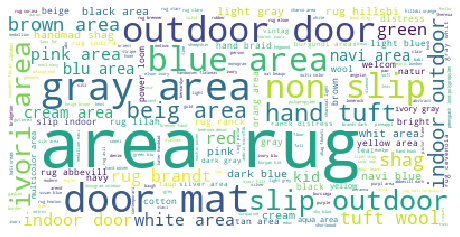

In [123]:
# Start with one review:
text = ' '.join(text_classification_data_Name['Product_Name'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Model Building

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
sns.boxplot(text_classification_data['Review_Numbers'])

In [ ]:
text_classification_data_Name.describe()

In [ ]:
text_classification_data.columns.tolist()

In [ ]:
def f(row):
    if row['Review_Numbers'] <= 453.5:
        val = 'Weak'
    elif row['Review_Numbers'] <= 2266:
        val = 'Neutral'
    else:
        val = 'Good'
    return val

In [ ]:
text_classification_data_Name['label'] = text_classification_data_Name.apply(f, axis=1)

In [ ]:
text_classification_data_Name['label'].value_counts()

In [ ]:
#split the dataset
sentences = text_classification_data_Name['Product_Name'].values
y = text_classification_data_Name['label'].values
train_x, valid_x, train_y, valid_y = train_test_split(sentences, y, test_size=0.3)

In [ ]:
encoder = preprocessing.LabelEncoder()
integerMapping=dict(zip(valid_y,encoder.fit_transform(valid_y)))
integerMapping

In [ ]:
# label encode the target variable 
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer()
count_vect.fit(text_classification_data_Name['Product_Name'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(text_classification_data_Name['Product_Name'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [ ]:
# def function for multilabel confustion_matrix
from sklearn.metrics import multilabel_confusion_matrix
def multiple_matrix(predictions,valida_y):
    mcm = multilabel_confusion_matrix(predictions, valida_y)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    precision = tp/(tp+fp)
    return precision  

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return multiple_matrix(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

In [ ]:
# Deploy NB, Count Vectors which have the accuracy performance as our final model to identify the
# product description is good or not in the short future

In [ ]:
# Final Model
clf2 = naive_bayes.MultinomialNB()
clf2.fit(xtrain_count, train_y)

In [ ]:
#Export Model
from joblib import dump, load
dump(clf2, 'Product_Name_Model.joblib') 

In [ ]:
#Load Model
clf2 = load('Product_Name_Model.joblib') 

# Models

## Features Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# load data
dataset = model_dataset.drop(columns = 0 )
# split data into X and y
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [ ]:
keywords_final.columns = ['keywords','Review_Numbers_Mean','Review_Numbers_Count']
keywords_final

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X,y)

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores.loc[feature_scores > 0.03].index.tolist()

## Building Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))